# Predicting Population Density Using Landcover Data
##### By: Manny Fors, Liam Smith, Alex Xu

## Abstract

Our project takes on the challenge of predicting population density in regions lacking data. Leveraging landcover image data and tract geometry, our approach involves computing zonal statistics and employing machine learning models. With this problem in mind, we employ satellite data from Connecticut due to its completeness and its potential to also be applied to other Northeastern States within the US. We create Linear Regression models and Spatial Autoregression models with our zonal statistics and tract data. We gauge their efficacy based on their mean-squared error and $R^2$ value. Through this, we find that Linear Regression with No Penalty works best out of our Linear Regression models and our Endogenous Spatial Autoregression model works better than the Exogenous model. Furthermore, we conclude that Spatial Autoregression is more effective at predicting population density than Linear Regression. In regions without adequate census data, the Exogenous model would improve estimations of population density by taking into account the landcover of a given region and its neighbors. Our code and datasets are available through our [Github](https://github.com/Liam-W-Smith/csci-0451-final-project/tree/main)

## Introduction
In countries such as the US, there is a large and accurate amount of census data. However there are many ountries in areas where the resources for gathering census data is [lesser](https://nigeria.iom.int/news/npc-we-lack-accurate-figures-nigerias-population). This is potentially due to geographic inaccessibility, political conflict, administrative failiure, and as mentioned previously, a lack of resources. **Thus, we want a way to predict human populations around the world with the data of the land itself, satellite imagery**. With this imaging, the geography is divided into classes which we can then use as variables for our model. Research into this topic has stagnated to a degree, however @tian2005modeling produced a hallmark paper which tested the effectivity of modeling population with land cover data. It found that a similar model could have "feasible" and can have "high accuracy". They utilized Linear Regression, and also manually broke down China into even 1km by 1km cells. Because of availablity of census data, we instead used census tracts, but we continued with the idea of utilizing Linear Regression. With some exploratory graphs of Connecticut, we discovered there might be a Spatial Pattern within our data. In order to take this into account during modeling, we started researching into machine learning algorithms with a spatial component. We came across a paper by @liu2022incorporating, which concluded that models with a spatial component, such as spatial lag, garner better results than those without. They used spatial lag, and eigvenvectors spatial filtering to predict things beyond our datasets such as soil types. Thus, we sought to create Linear Regression Models and Spatial Autoregressive models, and compare the them to see which is more effective in predicting population density based on land cover.

## Values Statement

NASA in a webinar session called “Humanitarian Applications Using NASA Earth Observations” presented how satellite remote-sensing data could be useful in monitoring humanitarian conditions at refugee settlements. Human settlements could be detected through remote sensing images and therefore could be used to predict the population in a region. This talk alerted us that we still lack necessary population data in many parts of the world, but also demonstrated how remote sensing could be a powerful tool in tackling this problem and solving lack of population data in different countries. Thus, we decide to investigate the connection between remote sensing land cover data and population density in a context with better data coverage. 

This type of model would be most beneficial by governments and government organizations. These users would most likely be hospital contractors, policy makers, emergency services providers such as ambulances and firefighers, and sociologists. Population census data is crucial for policy makers as it assists in city management so that the equitable distribution of resources can be better calculated. 

The implications extend beyond helping users. Real people would be affected by this technology. Those who are workers in fields such as emergency service work, or school teachers who might have been over-worked previously may be relieved by the building of new hospitals and schools to compensate for population changes. However, the negative effects are also extremely real. 

Imagining that this model expanded beyond the barriers of Connecticut and is being used in countries with much lower census data such as Brazil, there might be a calculation for a forestry company to continue harvesting wood from the Amazon, but they do not want to affect populations. Our algorithm calculates there are very few people in the area, as there is very dense land cover in the Amazon. This company starts to cut down trees and discovers that they are in an area of Indigenous peoples. A minority group that is already negatively affected continues to be disenfranchised. The issue of undercalculating the population density in an area can also affect the amount of resources a policymaker might provide to a region with a much greater population and lacking resources. This would also continue to negatively impact an already negatively impacted area.

Ultimately, the world would be a more equitable and sustainable place if this type of technology could assist countries lacking population data. The positive aspects of providing data where there is none provides the potential for great resource partioning, and better understanding of a countries population.

## Materials and Methods

### Necessary Data
With this project being the entire state of Connecticut, we utilized landcover data, population, shape files for graphing, and synthesized data which combined our various data sets into manageable datasets suitable for modeling. 

The bread and butter of our data stems from a 1-meter resolution landcover imagery covering the entire state of Connecticut. 
Derived from NAIP, the data has already been processed such that every pixel represents a certain class of landcover.

At over 800 MB, the dataset is too large to share via GitHub, and is downloadable by clicking on the first option at [this link](https://coastalimagery.blob.core.windows.net/ccap-landcover/CCAP_bulk_download/High_Resolution_Land_Cover/Phase_2_Expanded_Categories/Legacy_Land_Cover_pre_2024/CONUS/index.html). This landcover dataset was one of the most complete datsets we could find, which is why we wanted to use it for our modelling.

Our other data sources are the geometries and population data on the Census tract level for the state of Connecticut.
We downloaded tract geometries directly into our Jupyter Notebook **final_project.ipynb** using the Pygris package, and we downloaded the population data from Social Explorer, storing it at **data/population.csv**.



### Methods

First, we clean and prepare our data for the model.
We start by combining our Tract Geometry of CT with the Population Data of CT to form a new dataset. We utilize both the CT Landcover Data and the Tracts Data in a calculation of Zonal Statistics. This means we calculate the proportion of pixels within each tract that are of a given landcover class. This then is saved as a combined dataset which we then continue to clean by imputing values, performing more advanced Zonal Statistics, and dropping any NA Columns. From there, we are left with data ready to be used in a model. 

The flowchart below more elegantly outlines this process

```{mermaid}
flowchart LR
  A(Population Data) --> B(Tracts Data)
  C(Tracts Geometry Data) --> B(Tracts Data)
  B --> D{Zonal Statistics}
  E(CT Landcover Data) --> D{Zonal Statistics}
  D{Zonal Statistics} --> F(Combined Data)
  F(Combined Data) --> |Impute Data| G[Ready for Model]
  F --> |Additional Landcover Statistics| G[Ready for Model]
  F --> |Drop Uncommon Landcover| G[Cleaned Data]
```

We then implement three types of Linear Regression: 

* Linear Regression with No Penalty Term 

* Linear Regression with $\ell_1$ Regularization (Lasso Regression)

* Linear Regression with $\ell_1$ Regularization (Ridge Regression)


By utilizing the $R^2$ and Mean Squared Error, we quantified the success of each of our models against one another as well as comparing them to `sci-kit learn`'s own implementations of each of these Linear Regression Models.

Following Linear Regression, we then wanted to implement two types of Spatial AutoRegression: 

* Endogenous Spatial Autoregression

* Exogenous Spatial Autoregression 

As our data can be plotted on a map of Connecticut, we felt it would be amiss to not explore Spatial Autogression. Through this style of model, we can take into account the spatial aspect of each tract when we are predicting. We chose both Endogenous and Exogenous Models. Endogenous Models take into account the neighboring tract population densities of a given tract. Exogenous Models take into account the zonal statistics of a given tract's neighbors. 

We merge our data with shape file and calculate the spatial lag of a each tract's neighbors. The spatial lag is this case is the average population density of a given tracts of land. We also calculate the average landcover types of a given's tracts neighbors. 

In total, we create 8 models which we compare in order to determine the best way to predict population density with landcover data

```{mermaid}
flowchart 
A[Cleaned Data] --> B{No Penalty LR}
A --> C{Lasso LR}
B --> K{ours}
B --> L{sci-kit learn}
C --> G{ours}
C --> H{sci-kit learn}
A --> D{Ridge LR}
D --> I{ours}
D --> J{sci-kit learn}
A --> |Spatial Lag Pop Density| E{Endogenous}
A --> |Spatial Lag Landcover| F{Exogenous}

```

# Data Preparation
First we import our necessary libraries.

In [1]:
%%script echo skipping # Comment this line out if you want to install these packages
# !pip install pygris
# !pip install folium
# !pip install rasterio
# !pip install rasterstats
# !pip install libpysal
# !pip install geopandas

skipping # Comment this line out if you want to install these packages


In [2]:
# Load packages
%load_ext autoreload
%autoreload 2
import pygris
from pygris import tracts
from matplotlib import pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import Patch
import pandas as pd
import folium
import numpy as np
import torch
from linear_regression import LinearRegress, GradientDescentOptimizer
from rasterstats import zonal_stats
import rasterio
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import libpysal as lp
import geopandas as gpd

## Acquire Tract Geometries
As a test of concept, lets utilize the pygris library to access the CT tracts information and then let's do a simple plot to ensure it's correct.

Using FIPS code '09' for input 'CT'


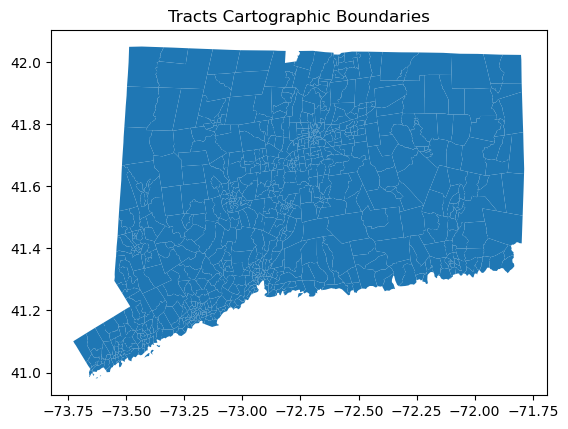

In [3]:
# Download geometry
ct_tracts = tracts(state = "CT", cb = True, cache = True, year = 2016)

# Display geometry
fig, ax = plt.subplots()
ct_tracts.plot(ax = ax)
plt.title("Tracts Cartographic Boundaries");

## Calculate Population Density

Before we begin our journey into zonal statistics and eventually creating a predictive model, we first want to understand what the population density looks like in Connecticut. We have some general hypotheses that the areas around New Haven and Hartford are going to have higher amounts of population, and we also expect to see some small pockets of communities around Connecticut.

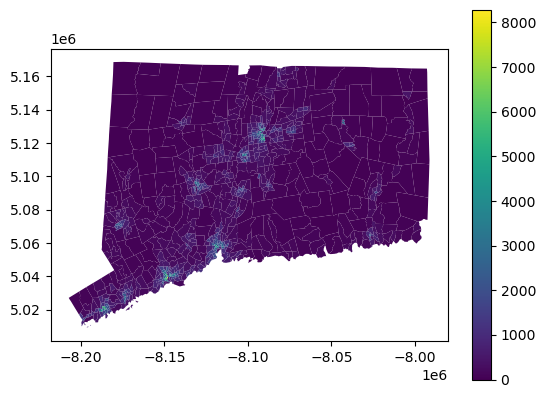

In [4]:
# Import tracts population data
pop = pd.read_csv("../data/population.csv")

# Convert data type so join key matches
ct_tracts["Geo_TRACT"] = ct_tracts["TRACTCE"].astype(int)

# Join attributes to geometry
tracts = ct_tracts.merge(pop, how = "inner", on='Geo_TRACT')

# Project tracts
tracts = tracts.to_crs("EPSG:3857")

# Calculate area in KM^2
tracts["Area"] = tracts.area/1000**2

# Calculate population density
tracts["PopDensity"] = tracts["SE_A00001_001"]/tracts["Area"]

# Create map
tracts.plot("PopDensity", legend = True);

# Intro to Zonal Statistics
We are going to do quite a bit here which is being abstracted away by the [`rasterio`](https://pypi.org/project/rasterio/) package. First and foremost, we are going to load in our landcover data from [CONUS](https://www.ncei.noaa.gov/products/satellite/gridded-goes-conus) which is created from satellite date of the Continental United States.

This data comes in the form of a `.tif` file which is a filetype used for storing geographic satellite data.

The goal of zonal statistics here is relatively straightforward, we are going to do some math that involves the pixels in a given geographic satellite image. Each pixel has an associated number which itself is associated with a key. Each pixel is contained in a "tract" which is a measurement of land by the US Census. We perform mathematics like finding the mean type of pixel in a given area, the max, the minimum, etc. This arithmetic is handled by the [`rasterstats`](https://pythonhosted.org/rasterstats/) package.

## First steps 
Here we open our path to our file, and more importantly, we set up our data to be used in zonal statistics. `.read` turns our data into a Numpy Array. Following this we are going to `.transform` our data, which means we are going to take the pixel locations of our coordinates (row col) and map them to our spatial coordinates (x, y). These coordinate values are relative to the [CRS](https://www.ncei.noaa.gov/products/satellite/gridded-goes-conus) (Coordinate Reference System) which we defined earlier as **"EPSG:2234"**

In [5]:
%%script echo skipping
#the data can be accessed from https://coastalimagery.blob.core.windows.net/ccap-landcover/CCAP_bulk_download/High_Resolution_Land_Cover/Phase_2_Expanded_Categories/Legacy_Land_Cover_pre_2024/CONUS/ct_2016_ccap_hires_landcover_20200915.zip
raster_path = '../data/ct_2016_ccap_hires_landcover_20200915.tif'
landcover = rasterio.open(raster_path)
arr = landcover.read(1)
affine = landcover.transform

skipping


## Performing Zonal statistics
It's as simple as importing rasterstats. We have handled the important data manipulation, and now it's basically plug and play! One function to note is `.to_crs` which takes in given coordinate reference system and transforms all the points in our dataframe to match that system.

The `rasterstats` library is very good at getting information from rasters, and we can in fact gain more information by using `categorical = True`. This allows to see the amount of each type of pixel at a given tract.

In [6]:
%%script echo skipping
df_new = zonal_stats(zone, arr, affine=affine, categorical = True)

skipping


Taking a look at our dataframe, we can confirm that each column is a type of pixel and each row is a tract

In [7]:
%%script echo skipping
df_categorical = pd.DataFrame(df_new)
df_categorical

skipping


## Visualizing Zonal Stats
Now that we have information on the amount of each pixel at a given tract, we can find the most common pixel per tract by using the function `.idxmax()` which will through each row and find the column with the largest value.

In [8]:
%%script echo skipping
df_categorical['max_type'] = df_categorical.idxmax(axis=1)
combined_df = pd.concat([tracts, df_categorical], axis=1)
combined_df['max_type'] = combined_df['max_type'].astype(str)

skipping


In [9]:
%%script echo skipping
combined_df.plot("max_type", legend = True);

skipping


### Saving this data
These statistics took quite a while to run, and it may be beneficial to save this data as a csv to continue running statistics in the future

In [10]:
%%script echo skipping

combined_df.to_csv('../data/combined_data.csv', index=False)

skipping


# Linear Regression

## Data Preparation

First, we import our data.

In [11]:
# Import and display data
data = pd.read_csv("../data/combined_data.csv")
data.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,18,19,20,21,22,7,6,0,23,max_type
0,9,1,11000,1400000US09001011000,9001011000,110.0,CT,4473567,3841130,POLYGON ((-8191739.173321358 5013468.769836016...,...,136572.0,423692.0,142589.0,1378858.0,NaN,NaN,NaN,NaN,NaN,2
1,9,1,20800,1400000US09001020800,9001020800,208.0,CT,2315472,0,POLYGON ((-8187432.3302968815 5025136.84023609...,...,NaN,NaN,27939.0,NaN,NaN,NaN,NaN,NaN,NaN,11
2,9,1,21400,1400000US09001021400,9001021400,214.0,CT,1640443,0,POLYGON ((-8189589.702028457 5021116.993618919...,...,NaN,NaN,13728.0,NaN,NaN,NaN,NaN,NaN,NaN,2
3,9,1,22200,1400000US09001022200,9001022200,222.0,CT,1442382,117063,POLYGON ((-8186995.178656538 5019223.193891366...,...,NaN,20584.0,80161.0,99956.0,NaN,NaN,NaN,NaN,NaN,2
4,9,1,43100,1400000US09001043100,9001043100,431.0,CT,6652660,58522,POLYGON ((-8178763.436270848 5029936.759394648...,...,NaN,NaN,9940.0,68655.0,486.0,NaN,NaN,NaN,NaN,11


Looks like there is some missing data in tracts that contain no pixels of a certain class.
Let's impute 0 for all `NaN` values.

In [12]:
# Impute 0 for missing data
print("Before imputation, there were", pd.isnull(data.iloc[:,68:-1]).sum().sum(), "NaN values.")
data[pd.isnull(data.iloc[:,68:-1])] = 0
print("After imputation, there are", pd.isnull(data.iloc[:,68:-1]).sum().sum(), "NaN values.")
data.head()

Before imputation, there were 5774 NaN values.
After imputation, there are 0 NaN values.


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,18,19,20,21,22,7,6,0,23,max_type
0,9,1,11000,1400000US09001011000,9001011000,110.0,CT,4473567,3841130,POLYGON ((-8191739.173321358 5013468.769836016...,...,136572.0,423692.0,142589.0,1378858.0,0.0,0.0,0.0,0.0,0.0,2
1,9,1,20800,1400000US09001020800,9001020800,208.0,CT,2315472,0,POLYGON ((-8187432.3302968815 5025136.84023609...,...,0.0,0.0,27939.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2,9,1,21400,1400000US09001021400,9001021400,214.0,CT,1640443,0,POLYGON ((-8189589.702028457 5021116.993618919...,...,0.0,0.0,13728.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,9,1,22200,1400000US09001022200,9001022200,222.0,CT,1442382,117063,POLYGON ((-8186995.178656538 5019223.193891366...,...,0.0,20584.0,80161.0,99956.0,0.0,0.0,0.0,0.0,0.0,2
4,9,1,43100,1400000US09001043100,9001043100,431.0,CT,6652660,58522,POLYGON ((-8178763.436270848 5029936.759394648...,...,0.0,0.0,9940.0,68655.0,486.0,0.0,0.0,0.0,0.0,11


Now that we have complete data, we can calculate the proportion of pixels belonging to each class.

In [13]:
# Calculate total number of pixels in each tract
data["sum"] = data.iloc[:,68:-1].sum(axis = 1)

# Calculate proportion of pixels belonging to each class
data.iloc[:,68:-2] = data.iloc[:,68:-2].div(data['sum'], axis=0)

# View data
data.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,19,20,21,22,7,6,0,23,max_type,sum
0,9,1,11000,1400000US09001011000,9001011000,110.0,CT,4473567,3841130,POLYGON ((-8191739.173321358 5013468.769836016...,...,0.069327,0.023331,0.225616,0.000000,0.0,0.0,0.0,0.0,2,6111530.0
1,9,1,20800,1400000US09001020800,9001020800,208.0,CT,2315472,0,POLYGON ((-8187432.3302968815 5025136.84023609...,...,0.000000,0.012054,0.000000,0.000000,0.0,0.0,0.0,0.0,11,2317904.0
2,9,1,21400,1400000US09001021400,9001021400,214.0,CT,1640443,0,POLYGON ((-8189589.702028457 5021116.993618919...,...,0.000000,0.008350,0.000000,0.000000,0.0,0.0,0.0,0.0,2,1644135.0
3,9,1,22200,1400000US09001022200,9001022200,222.0,CT,1442382,117063,POLYGON ((-8186995.178656538 5019223.193891366...,...,0.013289,0.051753,0.064533,0.000000,0.0,0.0,0.0,0.0,2,1548918.0
4,9,1,43100,1400000US09001043100,9001043100,431.0,CT,6652660,58522,POLYGON ((-8178763.436270848 5029936.759394648...,...,0.000000,0.001484,0.010249,0.000073,0.0,0.0,0.0,0.0,11,6698858.0


In [14]:
# Separate predictors and outcome
X = data.iloc[:,68:-2]
y = data["PopDensity"]

We had an issue where our results were not quite matching those of `scikit-learn` and we discovered that this was due to a way we set up our dataset.
Since we have calculated the proportion of pixels in each tract belonging to each landcover class, the landcovers sum to 1 in every row.
Since we create an additional column of ones in order to calculate a y-intercept for linear regression with gradient descent, this means that our y-intercept column is equal to the sum of our other columns.
In other words, the constant column is linearly dependent on our other predictor columns.
To address this issue, we drop some columns that seem unimportant.
Specifically, these columns are mostly zero, meaning that they are not very common in Connecticut anyway.

In [15]:
# Drop some landcovers to address issue of linear combination 
X = X[['2', '5', '11', '12', '8', '13', '14', '15', '20', '21']]

## Linear Regression with No Penalty Term

### Sci-kit Learn

#### Train Model

First, we fit a linear regression model with scikit-learn.
We do this simply to verify against our own implementation of linear regression. 

In [16]:
# Fit model
# Doing this just for the purpose of seeing what it looks like
# We can use the results from this package to verify that our implementation is working properly

#Train and test split creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LR_s = LinearRegression() 

m = LR_s.fit(X_train, y_train)

Linear regression seeks to minimize the mean squared error, so we report the mean square error from `scikit-learn`'s model here.

In [17]:
# MSE
mean_squared_error(y_train, LR_s.predict(X_train))

227396.12768129486

Let's check the $R^2$ value of our model.
Recall that $R^2$ is also known as the *coefficient of determination*, and it represents the proportion of variation in one's outcome variable that is explained by one's model.

In [18]:
# R^2 value
m.score(X_train, y_train)

0.7723901708932351

With an $R^2$ value of roughly $0.772$, our ordinary least squares regression model accounts for about $77.2$% of the variation of the population densities in Connecticut's tracts.

Let's inspect the y-intercept and coefficients to verify that our coefficients seem logical.

In [19]:
# Y-intercept
print("Intercept:", m.intercept_)

# Min and max population density
print("Population Density Min:", y_train.min())
print("Population Density Max:", y_train.max())

Intercept: 983.2395073145441
Population Density Min: 0.0
Population Density Max: 6084.305602883675


Since our predictions are proportions of pixels in a tract of a given landcover, it is impossible for all of our predictors to be zero.
Basically this means that no tract will be in the situation where all variables are equal to zero, leaving the y-intercept as its population density.
However, in theory, in the absence of any landcover pixels, the population density would be $983$ people per square kilometer.
With `y_train` ranging from 0 to 6084, this seems somewhat reasonable.


In [20]:
# Variable coefficients
m.coef_

array([  3409.40801231,  -2942.65854175,   -917.38563842,  -4525.6598175 ,
          668.32452458,  -2125.96537456,  -1746.52921947,  -1576.35637606,
       -13652.09857612,  -1417.12360532])

In [21]:
# Columns
X.columns

Index(['2', '5', '11', '12', '8', '13', '14', '15', '20', '21'], dtype='object')

Most of these coefficients are negative, indicating that as the proportion of pixels representing a given landcover type increases, the population density of the tract decreases.
The only positive values are the coefficient of `2`, which represents developed impervious landcover, and the coefficient of `8`, which represents grassland/herbaceous landcover.
We definitely anticipated a positive coefficient for `2`, as impervious developed surfaces like buildings and roads are a major marker of human presence.
The documentation indicates that while this landcover cannot be used for tilling, it can be used for grazing, so perhaps the positive coefficient is indicative of population density associated with farming.
Also, Connecticut is generally forested in rural areas, so grassy areas are likely in suburbia or near urban areas.
The magnitude of `2` is much larger than `8`, however, indicating that developed impervious landcover is the most important factor increasing population density.

The negative coefficients correspond to developed open space, mixed forest, shrub, palustrine forested wetland, palustrine scrub/shrub wetland, palustrine emergent wetland, barren land, and open water.
With the exception of developed open space, these landcovers are generally not associated with population density.
And developed open space does not necessitate people living in that location -- people could live in one tract and commute to a tract with developed open space for recreational purposes, for example.
Thus it makes sense that increased values of these variables contribute to less population density.

#### Test Model

Now that we have evaluated the basic interpretation of our model on our training data, let us check the performance of our model on our testing data.
First, we calculate our predictions.

In [22]:
# Create predictions (on test data)
preds = LR_s.predict(X_test)

Let us inspect the mean square error of our model on the testing data.

In [23]:
# MSE
mean_squared_error(y_test, preds)

373799.85511504946

At $373,800$, the mean squared error of our model on the testing data is much larger than the mean squared error on the training data, which was $227,396$.
This makes sense as our model was fit specifically to the tendencies of the training data.

To evaluate the explanatory power of our model, let's also calculate the $R^2$ value on our testing data.

In [24]:
# Test R^2 value
r2_score(y_test, preds)

0.7086666350845903

As one might anticipate, the $R^2$ value of the testing data is lower than the training data.
However, at $0.709$, the $R^2$ of the testing data is only $0.064$ lower than the $R^2$ of the training data.
In other words, our model explains $6.4$% less of the variation of the population density in our testing data.
This is not a negligible amount, but we are still relatively satisfied with a model that explains over $70$% of the variation in population density.

### Our Implementation

We implemented ordinary linear regression with gradient descent in [`linear_regression.py`](linear_regression.py).
Let us train the model using our implementation and verify that our results roughly match those of `scikit-learn`.

#### Train Model

First, we need to convert our training and testing data to the `torch.tensor` format to match the expected input of our model.
We also add a column of ones at the end of the X training and testing data for the purposes of training our y-intercept.

In [25]:
# convert to torch tensors
# add column of ones for y-intercept
X_train_torch = torch.cat((torch.tensor(X_train.values), torch.ones((X_train.shape[0], 1))), 1)
y_train_torch = torch.tensor(y_train.values)
X_test_torch = torch.cat((torch.tensor(X_test.values), torch.ones((X_test.shape[0], 1))), 1)
y_test_torch = torch.tensor(y_test.values)

Now that we have our data in the appropriate format, we can train our model.

In [26]:
# fit linear regression model
LR = LinearRegress()
opt = GradientDescentOptimizer(LR)

# initialize vector to record loss values
loss_vec = []

# fit model
for i in range(500000): 
    # update model
    opt.step(X_train_torch, y_train_torch, alpha = 0.01)

    # calculate and record loss
    loss = LR.loss(X_train_torch, y_train_torch) 
    loss_vec.append(loss)

Let's inspect the evolution of our loss function (mean squared error) to verify that our model has converged to a solution.

Mean squared error after training: 227396.1319467965


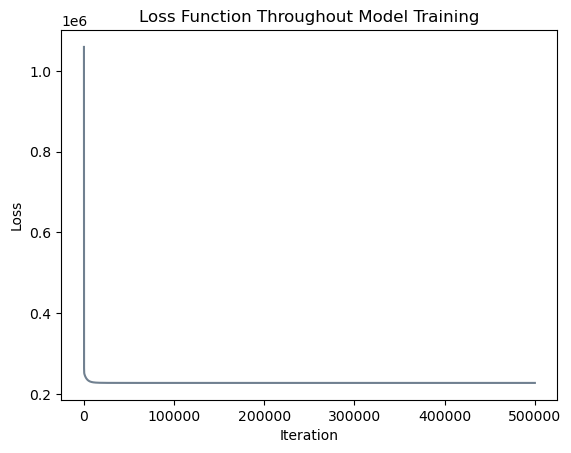

In [27]:
# plot the changes in loss 
plt.plot(loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Iteration", ylabel = "Loss")
plt.title("Loss Function Throughout Model Training");

# MSE
print("Mean squared error after training:", LR.mse(X_train_torch, y_train_torch).item())

Great!
After $500,000$ iterations, our mean squared error is $227,396.132$, which is essentially equivalent to the mean squared error of $227,396.128$ found by `scikit-learn`.

Let's inspect the y-intercept and coefficients to verify that they are similar to `scikit-learn`'s solution.

In [28]:
# Y-intercept
LR.w[-1]

tensor(983.0291, dtype=torch.float64)

This y-intercept is also similar to the figure of $983.2395$ reported by `scikit-learn`.

In [29]:
# Variable coefficients
print("Coefficients:", LR.w[:-1])

# Differences in signs
print("Differences in sign:", (torch.tensor(m.coef_)*LR.w[:-1]< 0).sum().item())

# Maximum difference in coefficient
print("Maximum coefficient difference:", torch.abs((torch.tensor(m.coef_)-LR.w[:-1])).max().item())

Coefficients: tensor([  3409.6334,  -2942.3605,   -917.2350,  -4527.3370,    669.5791,
         -2126.6514,  -1721.1996,  -1578.8776, -13651.8922,  -1416.8399],
       dtype=torch.float64)
Differences in sign: 0
Maximum coefficient difference: 25.329603726808955


Our coefficients are very similar to those from `scikit-learn`'s solution!
All coefficients have the same sign and the maximum difference between a coefficient in our two models is $25$.
Considering the magnitude of the coefficients, this difference is relatively small.
Thus the interpretation of our model matches the interpretation of `scikit-learn`'s model, making us confident that we have implemented linear regression correctly.

In [30]:
# Compute R^2 score
LR.r2(X_train_torch, y_train_torch)

tensor(0.7724, dtype=torch.float64)

Our $R^2$ value is the same as `scikit-learn`'s.

#### Test Model

Now we inspect our model's performance on the testing data.

In [31]:
# MSE
LR.mse(X_test_torch, y_test_torch)

tensor(373801.8165, dtype=torch.float64)

At $373,802$, our implementation's testing MSE is very similar to `scikit-learn`'s $373,800$, indicating similar performance.
Once again, this is substantially larger than the training MSE, indicating that our model did not generalize perfectly.

In [32]:
# R^2 value
LR.r2(X_test_torch, y_test_torch)

tensor(0.7087, dtype=torch.float64)

`Scikit-learn`'s testing $R^2$ value was also $0.7087$!
Overall, it appears that we have succesfully implemented linear regression in a manner that achieves similar results to `scikit-learn`.

## Linear Regression with $\ell_1$ Regularization

### Sci-kit Learn

#### Train Model

First, we fit the model with [`scikit-learn Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and inspect the resulting model.
As before, we do this simply to verify against our own implementation. 

In [33]:
# Fit model
LR_s_l1 = Lasso(alpha = 1)

m = LR_s_l1.fit(X_train, y_train)

# Report results
print("MSE:", mean_squared_error(y_train, LR_s_l1.predict(X_train)),
      "\nR^2:", m.score(X_train, y_train),
      "\nY-intercept:", m.intercept_,
      "\nCoefficients:\n", m.coef_)

MSE: 236944.40360579122 
R^2: 0.7628329217280919 
Y-intercept: -191.72480712350455 
Coefficients:
 [ 4358.88007237 -1696.29039686   224.06934601    -0.
     0.            -0.            -0.            -0.
 -6028.66936275  -279.44578393]


In [34]:
# Columns
X.columns

Index(['2', '5', '11', '12', '8', '13', '14', '15', '20', '21'], dtype='object')

The training MSE is slightly larger and the training $R^2$ is slightly smaller than linear regression with no regularizer, which makes sense as we have applied a penalty to help prevent overfitting.
The y-intercept is closer to $0$, and many of the coefficients are equal to exactly $0$, making them more interpretable: some coefficients simply do not matter!
In this model, landcover `2` (developed impervious) again has a positive coefficient, and with a large magnitude, it remains the main driver in high population density.
There is one other variable, `11` (mixed forest), which has a positive coefficient.
Interestingly, it was negative in the other model, leading to confusion in its interpretation.
But with a somewhat small magnitude, this variable overall has a minor impact on population density, only changing the population density by 224 people per square kilometer as its value increases from 0 to 1.
With the $\ell_1$ regularizer, the landcovers of shrub, grassland/herbaceous, palustrine forested wetland, palustrine scrub/shrub wetland, and palustrine emergent wetland are now equal to zero.
These coefficients must not have been that important to the model, as our regularizer made them have zero impact on population density.
Variables with negative coefficients are developed open space, barren land, and open water, probably for the same reasons that they were negative earlier.

#### Test Model

Next, we discover whether the $\ell_1$ regularizer actually made the model generalize better to the testing data.

In [35]:
# Create predictions (on test data)
preds = LR_s_l1.predict(X_test)

# Report results
print("MSE:", mean_squared_error(y_test, preds),
      "\nR^2:", r2_score(y_test, preds))

MSE: 390639.95954704983 
R^2: 0.6955417389066836


Our new MSE of $390,639$ is actually larger than the MSE of $373,800$ with no regularizer, indicating that the $\ell_1$ regularizer did not help our model generalize to the testing data.
Furthermore, the $R^2$ value was larger in the previous model, meaning that the model with no regularizer explained more variation in the outcome variable.

### Our Implementation

Let's fit linear regression with the $\ell_1$ norm with our own implementation and verify that our results match those of `scikit-learn`.
Note that `scikit-learn` uses an algorithm known as *coordinate descent* to find their solution, but we learned about *gradient descent* in this class.
*Coordinate descent* is better suited for lasso regression because it allows some coefficients to equal exactly zero.
Gradient descent with the $\ell_1$ norm makes some coefficients much smaller, but does not cause any of them to equal exactly zero.
To mimick their results, in our implementation we set our coefficients equal to zero if they are below a selected threshold.
We allow our model $5000$ iterations to begin learning the coefficients before applying this threshold.

#### Train Model

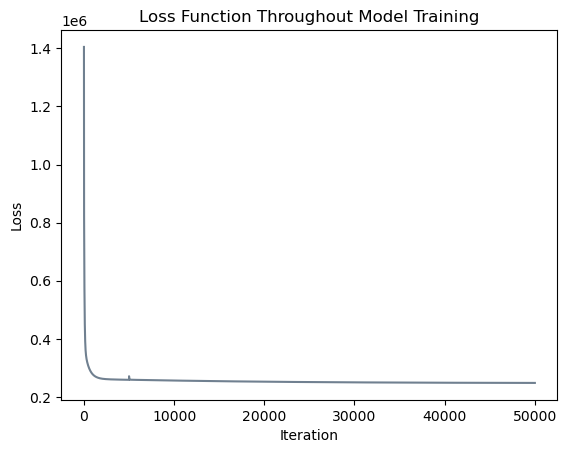

In [36]:
# fit linear regression model
LR_l1 = LinearRegress(penalty = "l1", lam = 1) # 1 in scikit-learn
opt_l1 = GradientDescentOptimizer(LR_l1)

# initialize vector to record loss values
loss_vec_l1 = []

# fit model
for i in range(50000):
    # update model
    opt_l1.step(X_train_torch, y_train_torch, alpha = 0.001)

    # set coefs equal to zero after model has had enough learning time
    if i > 5000:
        LR_l1.w[torch.abs(LR_l1.w) < 500] = 0

    # calculate and record loss
    loss = LR_l1.loss(X_train_torch, y_train_torch) 
    loss_vec_l1.append(loss)

# plot the changes in loss 
plt.plot(loss_vec_l1, color = "slategrey")
labs = plt.gca().set(xlabel = "Iteration", ylabel = "Loss")
plt.title("Loss Function Throughout Model Training");

It appears that our model converged to a solution with a similar loss function value!
Note that the small upwards blip in the loss function occured at iteration $5000$ when we began allowing our model to set some coefficients equal to zero.
Let us inspect our results and compare them to `scikit-learn`'s output.

In [37]:
# Report results
print("MSE:", LR_l1.mse(X_train_torch, y_train_torch).item(),
      "\nR^2:", LR_l1.r2(X_train_torch, y_train_torch),
      "\nY-intercept:", LR_l1.w[-1],
      "\nCoefficients:\n", LR_l1.w[:-1],
      "\nDifferences in sign:", (torch.tensor(m.coef_)*LR_l1.w[:-1]< 0).sum().item(),
      "\nMaximum coefficient difference:", torch.abs((torch.tensor(m.coef_)-LR_l1.w[:-1])).max().item())

MSE: 233736.21710488532 
R^2: tensor(0.7660, dtype=torch.float64) 
Y-intercept: tensor(0., dtype=torch.float64) 
Coefficients:
 tensor([ 4257.6646, -1977.7857,     0.0000,     0.0000,     0.0000,     0.0000,
            0.0000,     0.0000, -7781.5773,  -551.3119], dtype=torch.float64) 
Differences in sign: 0 
Maximum coefficient difference: 1752.9079262978257


Our model's MSE of $233,736$ is slightly smaller than `scikit-learn`'s MSE of $236,944$ and our model's $R^2$ of $0.7660$ is slightly larger than `scikit-learn`'s $R^2$ of $0.7628$, indicating that our linear regression model with the $\ell_1$ norm performed marginally better than theirs.
This difference could have occured due to differences in the optimizer and the number of training iterations.
Additionally, these MSE and $R^2$ metrics are both slightly worse than what our implementation achieved with no regularizer, which makes sense as we are attempting to prevent overfitting.

One should note that our workaround for setting coefficients equal to zero is not ideal for several reasons.
First, we hard-coded a certain threshold for choosing coefficients to set equal to zero, as well as a certain number of iterations at which to begin checking for these low-magnitude coefficients.
Most users probably do not want to decide on such a threshold.
Second, our method did not exactly replicate the output from `scikit-learn`.
Adjusting our parameters to exactly reproduce the coefficients set to zero proved difficult, and the best we were able to do involved setting the y-intercept and landcover `11` equal to zero, while they were nonzero in `scikit-learn`'s solution.
Landcover `11` represents mixed forest and was the one coefficient with a somewhat counterintuitive value in `scikit-learn`'s model, so in terms of interpretation, our new model still makes sense.
All coefficients have the same sign as `scikit-learn`'s model with similar magnitudes, making us confident that our model is successfully describing the situation, despite the minor discrepancies.

#### Test Model

In [38]:
# Report results
print("MSE:", LR_l1.mse(X_test_torch, y_test_torch),
      "\nR^2:", LR_l1.r2(X_test_torch, y_test_torch))

MSE: tensor(384765.6761, dtype=torch.float64) 
R^2: tensor(0.7001, dtype=torch.float64)


These values are pretty similar to the ones we have seen already.
At $384,766$, our implementation's MSE is less than `scikit-learn`'s $390,640$, and at $0.7001$, our implementation's $R^2$ is slightly more than `scikit-learn`'s $0.6955$.
This means that our model generalized slightly better to the testing data, in addition to performing better on the training data.
Again, this can likely be explained by differences in the optimization method and the number of training iterations.

Furthermore, this MSE is slightly larger than the $373,802$ figure returned by our implementation of linear regression with no penalty term, and this $R^2$ is slighly smaller than the $0.7087$ figure, indicating that linear regression with the $\ell_1$ penalty did not generalize better to the testing data.

## Linear Regression with $\ell_2$ Regularization

### Sci-kit Learn

#### Train Model

First, we fit the model with [`scikit-learn Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and inspect the resulting model.
As before, we do this to assess the validity of our own implementation. 

In [39]:
# Fit model
LR_s_l2 = Ridge(alpha = .1)

m = LR_s_l2.fit(X_train, y_train)

# Report results
print("MSE:", mean_squared_error(y_train, LR_s_l2.predict(X_train)),
      "\nR^2:", m.score(X_train, y_train),
      "\nY-intercept:", m.intercept_,
      "\nCoefficients:\n", m.coef_)


MSE: 235049.69085940512 
R^2: 0.7647294150800621 
Y-intercept: 69.8570955883946 
Coefficients:
 [ 4146.87047622 -2058.81157194     6.57006522 -1039.66258053
   107.03266863  -815.93549227  -127.78253829  -231.19197573
 -6438.07336424  -692.08973348]


In [40]:
# Columns
X.columns

Index(['2', '5', '11', '12', '8', '13', '14', '15', '20', '21'], dtype='object')

The training MSE is larger and the training $R^2$ is smaller than `scikit-learn`'s linear regression with no regularizer.
We anticipated this would be true in comparison to the no regularizer model as the penalty term helps prevent overfitting.
It appears that with our chosen parameters, lasso regression performed better than ridge regression in terms of both MSE and $R^2$, but this will change depending on the selected value for parameters.

The y-intercept and all coefficients except for landcover `2` are smaller than they were under linear regression without regularization, indicating that the regularization method has been successful in decreasing the magnitude of our coefficients.
None of the coefficients are equal to exactly zero, but that is to be expected when working with the $\ell_2$ penalty.

The sign of every coefficient in this model is the same as in the original linear regression model except for landcover `11` (mixed forest), which is now positive and was also positive under lasso regression.
However, the magnitude of this coefficient is really small; at 6.57, a location's population density only changes by 6.57 people per square kilometer as the proportion of pixels represented by mixed forest increases from 0 to 1.

#### Test Model

In [41]:
# Create predictions (on test data)
preds = LR_s_l2.predict(X_test)

# Report results
print("MSE:", mean_squared_error(y_test, preds),
      "\nR^2:", r2_score(y_test, preds))

MSE: 387635.2059385676 
R^2: 0.6978835936921313


On the testing data, our MSE of $387,635$ is similar to the result of $390,640$ with the $\ell_1$ regularizer but larger than the MSE of $373,800$ with no regularizer, indicating that the $\ell_2$ regularizer also did not help our model generalize to the testing data better than unregularized linear regression.
The $R^2$ value was also larger in linear regression, meaning that the model without regularization explained more variation in the outcome variable.

### Our Implementation
#### Train Model

Let's fit linear regression with the $\ell_1$ norm with our own implementation and verify that our results are reasonably similar to those of `scikit-learn`.

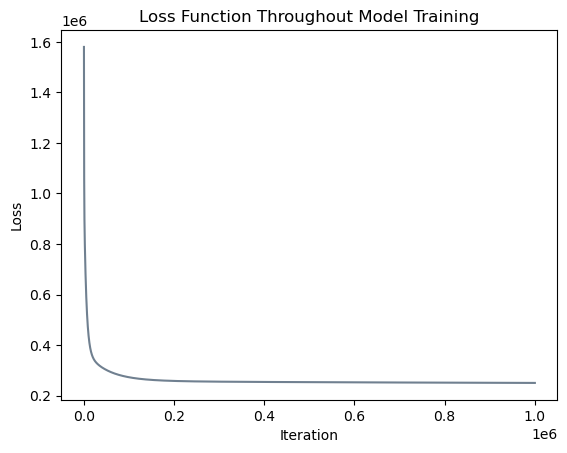

In [42]:
# fit linear regression model
LR_l2 = LinearRegress(penalty = "l2", lam = .1/X_train_torch.shape[0]) 
opt_l2 = GradientDescentOptimizer(LR_l2)

# initialize vector to record loss values
loss_vec_l2 = []

# fit model
for i in range(1000000): 
    # update model
    opt_l2.step(X_train_torch, y_train_torch, alpha = 0.00001)

    # calculate and record loss
    loss = LR_l2.loss(X_train_torch, y_train_torch) 
    loss_vec_l2.append(loss)

# plot the changes in loss 
plt.plot(loss_vec_l2, color = "slategrey")
labs = plt.gca().set(xlabel = "Iteration", ylabel = "Loss")
plt.title("Loss Function Throughout Model Training");

In [43]:
m.coef_

array([ 4146.87047622, -2058.81157194,     6.57006522, -1039.66258053,
         107.03266863,  -815.93549227,  -127.78253829,  -231.19197573,
       -6438.07336424,  -692.08973348])

In [44]:
# Report results
print("MSE:", LR_l2.mse(X_train_torch, y_train_torch).item(),
      "\nR^2:", LR_l2.r2(X_train_torch, y_train_torch),
      "\nY-intercept:", LR_l2.w[-1],
      "\nCoefficients:\n", LR_l2.w[:-1],
      "\nDifferences in sign:", (torch.tensor(m.coef_)*LR_l2.w[:-1]< 0).sum().item(),
      "\nMaximum coefficient difference:", torch.abs((torch.tensor(m.coef_)-LR_l2.w[:-1])).max().item())

MSE: 246031.0025521462 
R^2: tensor(0.7537, dtype=torch.float64) 
Y-intercept: tensor(-258.6768, dtype=torch.float64) 
Coefficients:
 tensor([ 4417.6162, -1821.4942,   373.5831,  -372.9745,  -251.1601,  -436.8005,
          -43.2542,  -109.9865, -2181.9550,  -541.2076], dtype=torch.float64) 
Differences in sign: 1 
Maximum coefficient difference: 4256.118320893194


In [45]:
X.columns

Index(['2', '5', '11', '12', '8', '13', '14', '15', '20', '21'], dtype='object')

First of all, our implementation does not generate identical output to `scikit-learn`'s implementation.
In order to make our implementation converge to a solution, we needed to make $\lambda$ far smaller than in their implementation.
This may have occurred because we are using the optimization technique of gradient descent, but `scikit-learn` has implemented a number of more complex techniques and automatically detects which one to use depending on the dataset it receives as input.
It is also possible that they implemented their loss function as the sum of squared error rather than the mean squared error.
If this is the case, then dividing our $\lambda$ by the number of observations should theoretically produce identical results.
In the code above, we opt for this implementation; however, it should be noted that we have not confirmed whether `scikit-learn` actually uses the sum of squares in their loss function.
Even with this modification, our model has converged to a different solution than theirs, for reasons we have not uncovered.

Although our results are different, they are not drastically different.
Our MSE is $246,030$ rather than $235,050$ and our $R^2$ is $0.7537$ rather than $0.7647$, differences that are not ideal but also not terrible.
All coefficients have the same sign as their solution except for `8` (grassland/herbaceous).
In all prior models, the coefficient of landcover `8` has been positive or zero, but in this model, it is negative!
This confuses the interpretation of landcover `8`, but with only one discrepancy it does not necessarily ring alarm bells.
Perhaps if we had the time to confirm `scikit-learn`'s loss function and implement the same optimization method we would achive more similar results.

#### Test Model

In [46]:
# Report results
print("MSE:", LR_l2.mse(X_test_torch, y_test_torch),
      "\nR^2:", LR_l2.r2(X_test_torch, y_test_torch))

MSE: tensor(399693.2117, dtype=torch.float64) 
R^2: tensor(0.6885, dtype=torch.float64)


At $399,692$, our implementation's MSE is more than `scikit-learn`'s $387,635$ as well as all prior results.
And at $0.6885$, our implementation's $R^2$ is less than `scikit-learn`'s $0.6979$ and all other results.
We could achieve better results by modifying our parameter values, but we were unable to identically reproduce the output of `scikit-learn`.
Overall, our results indicate that for this problem, regularization does not lead to improved performance on the testing data, although it may facilitate interpretation of coefficients.

## Discussion of Linear Regression

In linear regression, a major assumption is that all observations are independent of each other.
However, when working with spatial data, nearby observations are often similar, such that observations are not independent if they are in close proximity to each other.
In order to determine whether our model suffers from such spatial dependence, we will fit a linear regression model on the entire dataset and produce a map of our model's residuals.
We opt for linear regression without regularization due to its higher performance in the work above.

In [47]:
# convert to torch tensors
# add column of ones for y-intercept
X_torch = torch.cat((torch.tensor(X.values), torch.ones((X.shape[0], 1))), 1)
y_torch = torch.tensor(y.values)

# fit linear regression model
LR_full = LinearRegress()
opt_full = GradientDescentOptimizer(LR_full)

# fit model
for i in range(500000): 
    # update model
    opt_full.step(X_torch, y_torch, alpha = 0.01)

    # calculate and record loss
    loss = LR_full.loss(X_torch, y_torch) 

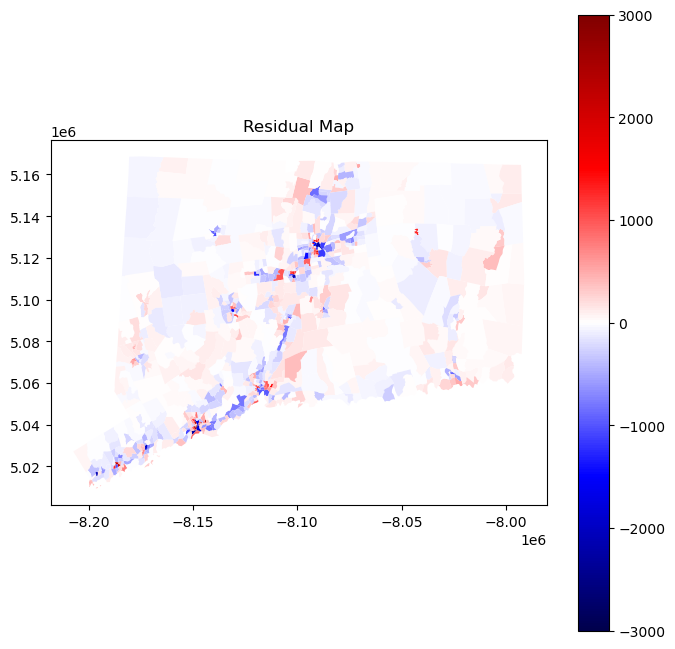

In [48]:
# calculate residuals
resid = (y_torch - LR_full.pred(X_torch))

# add residual column to tracts
tracts["resid"] = resid

# specify that color ramp should be centered at 0
divnorm = TwoSlopeNorm(vmin=-3000, vcenter=0., vmax = 3000)

# create map
resid_map = tracts.plot("resid", legend = True, cmap = "seismic", norm = divnorm, figsize = (8,8))
plt.title("Residual Map");


In an ideal scenario with spatially independent observations, the values of residuals would be distributed randomly throughout the map.
However, with clear clusters of red and blue, our model visually appears to be making similar errors in nearby places.
In other words, our residuals suffer from spatial autocorrelation.
This may occur because the population density in one tract influences the population density in another tract; similarly, the landcover in one tract may influence the population density in a neighboring tract.
Fortunately, there exists an entire field of spatial statistics dedicated to addressing issues of spatial autocorrelation.
In the following section, we will employ one technique, known as *spatial lag regression*, in order to account for spatial dependence and hopefully improve our results.
Before continuing to our section on spatial autoregression, we first perform cross-validation on linear regression and report the average root mean squared error (RMSE) in order to compare our results to our autoregressive results.
We will opt for `scikit-learn`'s linear regression class since it is faster and achieves identical results to ours.

In [49]:
# define model
LR = LinearRegression() 

# define scoring function
# this is just required in order to use scikit-learn's cross_val_score function
# basically they multiply the MSE by -1, so we need to account for that afterwards
mse_score = make_scorer(mean_squared_error, greater_is_better = False)

# cross validation
cv_scores_LR = cross_val_score(estimator = LR, X = X, y = y, scoring = mse_score, cv = 4)

# compute average RMSE
np.sqrt(-1*cv_scores_LR).mean()

503.0545511056982

With regular linear regression, we have achieved an average cross-validation RMSE of $503$ people per square kilometer.
Let's see if accounting for space can improve our results!

# Spatial Autoregression

In previous section, we predicted the population denisty of tracts, considering each tract as independent from each other. However, in reality, the population densisty of each tract is dependent on its neighbors. For example, in urban regions, high density tracts are typically surrounded by high density tracts (the opposite holds true in rural area tracts). The first law of geography states that "everything is related to everything else, but near things are more related than distant things." Spatial autoregression model considers the features of the surrounding objects as part of the prediction. In this section, we are going to implement spatial autoregressive model on predicting the density data. 

## Data Processing and Exploration

In this spatial autoregression model, we adopt queen criterion to construct spatial continuity weight matrix. The queen criterion defines neighbors as spatial units sharing a common edge or a common vertex. This means that in our model, we will add the features and characteristics of the neighboring tracts as part of the prediction variables. 

To find the weight matrix, we need to introduce geometry to our dataset. Here, I am merging the csv file to a shapefile and convert the merged data to a GeoDataFrame format. Later, I calculate the queen spatial continuity matrix using the `libpysal` pacakge. Using the spatial weight continuity matrix, we can then calculate the spatial lag data of population density, which is the mean population density of the neighboring tracts. 

In [5]:
# import shapefile
# need separate shapefile because the one form pygris didn't cooperate with the weights matrix functions
data = pd.read_csv("../data/combined_data.csv")
gdf = gpd.read_file('../data/tl_2016_09_tract.shp')

# create merge columns
gdf['TRACTCE'] = gdf['TRACTCE'].astype(int)
data['TRACTCE'] = data['TRACTCE'].astype(int)

# merge csv with shapfile using TRACTCE
merged_gdf = gdf.merge(data, on='TRACTCE', how='left')

# make merged_gdf into geo dataframe
merged_gdf = gpd.GeoDataFrame(merged_gdf)

# drop out all rows that have no population density
merged_gdf = merged_gdf.dropna(subset=['PopDensity'], axis=0)

# clean tracts that have truncated data on population density
merged_gdf = merged_gdf[merged_gdf['PopDensity'] != 0]
merged_gdf = merged_gdf[merged_gdf['TRACTCE'] != 194202]

# define the geometry_x column to be the geometry feature 
merged_gdf.set_geometry("geometry_x", inplace=True)

# calculate Queen's neighbor weights for each tracts
w = lp.weights.Queen.from_dataframe(merged_gdf)
w.transform = 'R'

# compute spatial lag of population density
merged_gdf['spatial_lag_PopDens'] = lp.weights.lag_spatial(w, merged_gdf['PopDensity'])

# calculate the mean pop density of each tract's neighbors
#merged_gdf['avg_neighbor_density'] = merged_gdf.groupby('TRACTCE')['spatial_lag'].transform('mean')
merged_gdf['PopDensity'] = merged_gdf['PopDensity'].astype(float)

# download merged_gdf to csv file
merged_gdf.to_csv('../data/merged_gdf.csv', index=False)


/tmp/ipykernel_18572/2255761594.py:27: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lp.weights.Queen.from_dataframe(merged_gdf)


Next, we want to perform a spatial autocorrelation evaluation using Global Moran's I index. This evaluation assesses the spatial distribution characteristic of the entire region. We plot the scatter plot between the population denisty and mean population denisty of tract's neighbors. The Global Moran's I index, if we do not delve into its mathematical details, is the slope of the best fit line between these two numbers. In our case, we calculated the Moran's I index to be 0.6. Together with the distribution of the scatter plot, we believe that population density of the neighboring tracts are dependent. We also want to inspect the spatial association at a local scale. The color of each tract is based on its own population density and the population density of its surrounding tracts. 

[Moran's Scatterplot](https://geographicdata.science/book/notebooks/07_local_autocorrelation.html) has four categories: High-High, High-Low, Low-High, Low-Low. High/low before the dash means whether the tract has a populuation density that is higher/lower than the mean overall population density. High/low after the dash means whether the tract's neighbors population denisty is above/below the average population density. After categorization, we map the tracts to inspect the distribution of the tracts' categories. We find that High-High tracts are usually in urban areas, Low-High tracts are usually suburbs, High-Low tracts are typically towns in the rural area, and Low-Low are rural tracts. Therefore, we believe that by taking into account the characteristics of the target tract's neighboring tract, we are able to predict population density better than ordinary least square regression. 

/tmp/ipykernel_18572/4162410205.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High-High' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_csv_moran.loc[(merged_csv_moran['spatial_lag_PopDens'] >= p) & (merged_csv_moran['PopDensity'] >= q), 'category'] = 'High-High'
/tmp/ipykernel_18572/4162410205.py:51: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(handles=legend_patches + [scatter, plt.Line2D([0], [0], color='red', label=f'(y = {slope:.2f}x + {intercept:.2f})')])


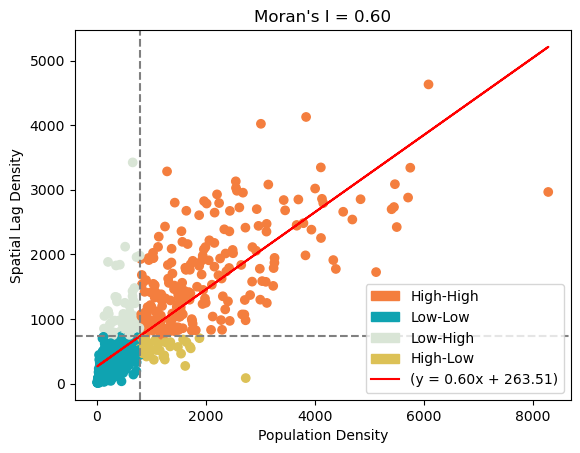

In [6]:
# read data
merged_csv_moran = pd.read_csv("../data/merged_gdf.csv", usecols=['PopDensity', 'spatial_lag_PopDens', "Geo_NAME"]).dropna()

# Extract x and y columns from the DataFrame
x = merged_csv_moran['PopDensity'].values.reshape(-1, 1)  # Reshape to make it a 2D array for scikit-learn
y = merged_csv_moran['spatial_lag_PopDens'].values

# Calculate the average for 'spatial_lag_PopDens' and 'PopDensity'
p = merged_csv_moran['spatial_lag_PopDens'].mean()
q = merged_csv_moran['PopDensity'].mean()

# Categorize the rows based on conditions
merged_csv_moran['category'] = 0  # Initialize category column
merged_csv_moran.loc[(merged_csv_moran['spatial_lag_PopDens'] >= p) & (merged_csv_moran['PopDensity'] >= q), 'category'] = 'High-High'
merged_csv_moran.loc[(merged_csv_moran['spatial_lag_PopDens'] >= p) & (merged_csv_moran['PopDensity'] < q), 'category'] = 'Low-High'
merged_csv_moran.loc[(merged_csv_moran['spatial_lag_PopDens'] < p) & (merged_csv_moran['PopDensity'] >= q), 'category'] = 'High-Low'
merged_csv_moran.loc[(merged_csv_moran['spatial_lag_PopDens'] < p) & (merged_csv_moran['PopDensity'] < q), 'category'] = 'Low-Low'

# Calculate the average for 'spatial_lag_PopDens' and 'PopDensity'
p = merged_csv_moran['spatial_lag_PopDens'].mean()
q = merged_csv_moran['PopDensity'].mean()

# Define custom colors for categories
colors = {'High-High': '#F47E3E', 'Low-Low': '#0FA3B1', 'Low-High': '#D9E5D6', 'High-Low': '#DCC156'}

# Create a scatter plot of x vs y
scatter = plt.scatter(x, y, color=merged_csv_moran['category'].map(colors))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Get the slope and intercept of the fitted line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the fitted line
plt.plot(x, model.predict(x), color='red', label=f'Linear Regression (y = {slope:.2f}x + {intercept:.2f})')

# Add labels and title
plt.xlabel('Population Density')
plt.ylabel('Spatial Lag Density')
plt.title("Moran's I = 0.60")

# Create legend entries manually
legend_patches = [
    Patch(color=color, label=label) for label, color in colors.items()
]

# Add the legend with custom entries and regression equation
plt.legend(handles=legend_patches + [scatter, plt.Line2D([0], [0], color='red', label=f'(y = {slope:.2f}x + {intercept:.2f})')])

# Draw horizontal and vertical dashed line at y = p
plt.axhline(y=p, color='gray', linestyle='--')
plt.axvline(x=q, color='gray', linestyle='--')

# Show plot
plt.show()

/tmp/ipykernel_18572/3545356962.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High-High' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_gdf.loc[(merged_gdf['spatial_lag_PopDens'] >= p) & (merged_gdf['PopDensity'] >= q), 'category'] = 'High-High'
/tmp/ipykernel_18572/3545356962.py:17: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  merged_gdf.plot(column='category', ax=ax, color=merged_gdf['category'].map(colors), legend=True)


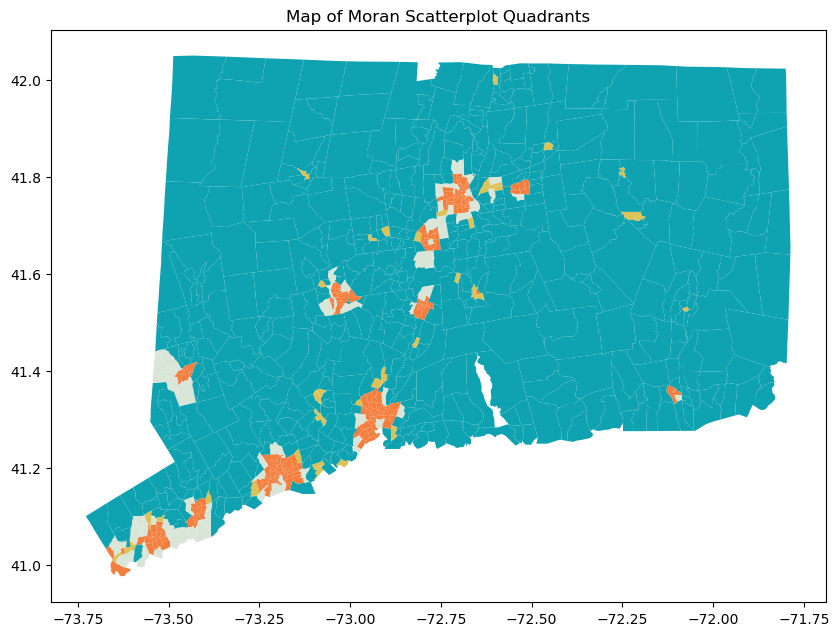

In [8]:
# Calculate the average for 'spatial_lag_PopDens' and 'PopDensity'
p = merged_gdf['spatial_lag_PopDens'].mean()
q = merged_gdf['PopDensity'].mean()

# Categorize the rows based on conditions
merged_gdf['category'] = 0  # Initialize category column
merged_gdf.loc[(merged_gdf['spatial_lag_PopDens'] >= p) & (merged_gdf['PopDensity'] >= q), 'category'] = 'High-High'
merged_gdf.loc[(merged_gdf['spatial_lag_PopDens'] >= p) & (merged_gdf['PopDensity'] < q), 'category'] = 'Low-High'
merged_gdf.loc[(merged_gdf['spatial_lag_PopDens'] < p) & (merged_gdf['PopDensity'] >= q), 'category'] = 'High-Low'
merged_gdf.loc[(merged_gdf['spatial_lag_PopDens'] < p) & (merged_gdf['PopDensity'] < q), 'category'] = 'Low-Low'

# Define custom colors for categories
colors = {'High-High': '#F47E3E', 'Low-Low': '#0FA3B1', 'Low-High': '#D9E5D6', 'High-Low': '#DCC156'}

# Plot the map using custom colors
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column='category', ax=ax, color=merged_gdf['category'].map(colors), legend=True)
plt.title('Map of Moran Scatterplot Quadrants')
plt.show()

Instead of using all possible land cover types, we are going to use land cover types that are more common among all tracts in CT for density prediction. The land cover types we selected are the same as the ones in linear regression section. 

In [9]:
# All landcover types
all_landcover = ['2', '5', '8', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '7', '6', '0', '23']
all_landcover_pct = ['2pct', '5pct', '8pct', '11pct', '12pct', '13pct', '14pct', '15pct', '17pct', '18pct', '19pct', '20pct', '21pct', '22pct', '7pct', '6pct', '0pct', '23pct']

# Select landcover types
landcover_types = ['2', '5', '11', '12', '8', '13', '14', '15', '20', '21'] #, '22', '7', '8', '13', '14', '15', '20', '21'
landcover_pct = ['2pct', '5pct', '11pct', '12pct', '8pct', '13pct', '14pct', '15pct', '20pct', '21pct'] # , '22pct', '7pct', '8pct', '13pct', '14pct', '15pct', '20pct', '21pct'

# Merge them into our data
merged_gdf['sum'] = merged_gdf[all_landcover].sum(axis=1)
merged_gdf[all_landcover_pct] = merged_gdf[all_landcover].div(merged_gdf['sum'], axis=0).multiply(100).astype(float)

# Download merged_gdf to csv file optionally 
#merged_gdf.to_csv('merged_gdf_saved.csv', index=False)

## Spatial Lag Regression

### Endogenous vs. Exogenous: What's the Difference?

There are two types of spatially lagged regression models. The first one is **spatially lagged endogenous regression model**. The endogenous model includes the spatial lagged value of the target variable as one of the explanatory variables for regression. In our case, the population density of a tract's neighbor is part of the variables we use to predict the population density of the tract.

The second type of spatially lagged regression model is **spatially lagged exogenous regression model**. Instead of taking into account the population density, our target variable, of the neighboring tracts, the exogenous model considers the explanatory variables of the tract's surroundings. In our case, the spatially lagged exogenous model adds neighbors' land type information to the model. We will calculate the spatial lagged value of each land cover type for all tracts and include them as part of the predictor variables.

We first fit both models to the entirety of CT and map their residuals on each tract. 
First, we fit the endogenous model.

In [57]:
# Endogenous model: consider spatial lag population denisty
predictor = landcover_pct + ['spatial_lag_PopDens']

# Get explanatory variables and target variable
X_merged_gdf = merged_gdf[predictor].values
y_merged_gdf = merged_gdf['PopDensity'].values.reshape(-1, 1)

# Create, fit, and predict with Linear Regression
model = LinearRegression()
model.fit(X_merged_gdf, y_merged_gdf)
y_pred = model.predict(X_merged_gdf)

# Calculate residuals 
residuals = y_merged_gdf - y_pred
merged_gdf['residuals'] = residuals

# Remove Spatial lag so that our Exogenous model does not take this into account
merged_gdf.drop(columns=['spatial_lag_PopDens'], inplace=True)

Next, we fit the exogenous model.

In [58]:
# Exogenous model: consider
exo_predictor = landcover_pct + ['lag_2pct', 'lag_5pct', 'lag_11pct', 'lag_12pct', 'lag_8pct', 'lag_13pct', 'lag_14pct', 'lag_15pct', 'lag_20pct', 'lag_21pct'] 

for i in range(len(landcover_pct)):
        merged_gdf['lag_' + landcover_pct[i]] = lp.weights.lag_spatial(w, merged_gdf[landcover_pct[i]])

# Get explanatory variables and target variable
X_merged_gdf_exo = merged_gdf[exo_predictor].values
y_merged_gdf_exo = merged_gdf['PopDensity'].values.reshape(-1, 1)

#Create, fit, and predict with Linear Regression
model_exo = LinearRegression()
model_exo.fit(X_merged_gdf_exo, y_merged_gdf_exo)
y_pred_exo = model_exo.predict(X_merged_gdf_exo)

#Calculate Residuals and make new column
residuals_exo = y_merged_gdf_exo - y_pred_exo
merged_gdf['residuals_exo'] = residuals_exo

Now, we visualize the map of residuals for both models.

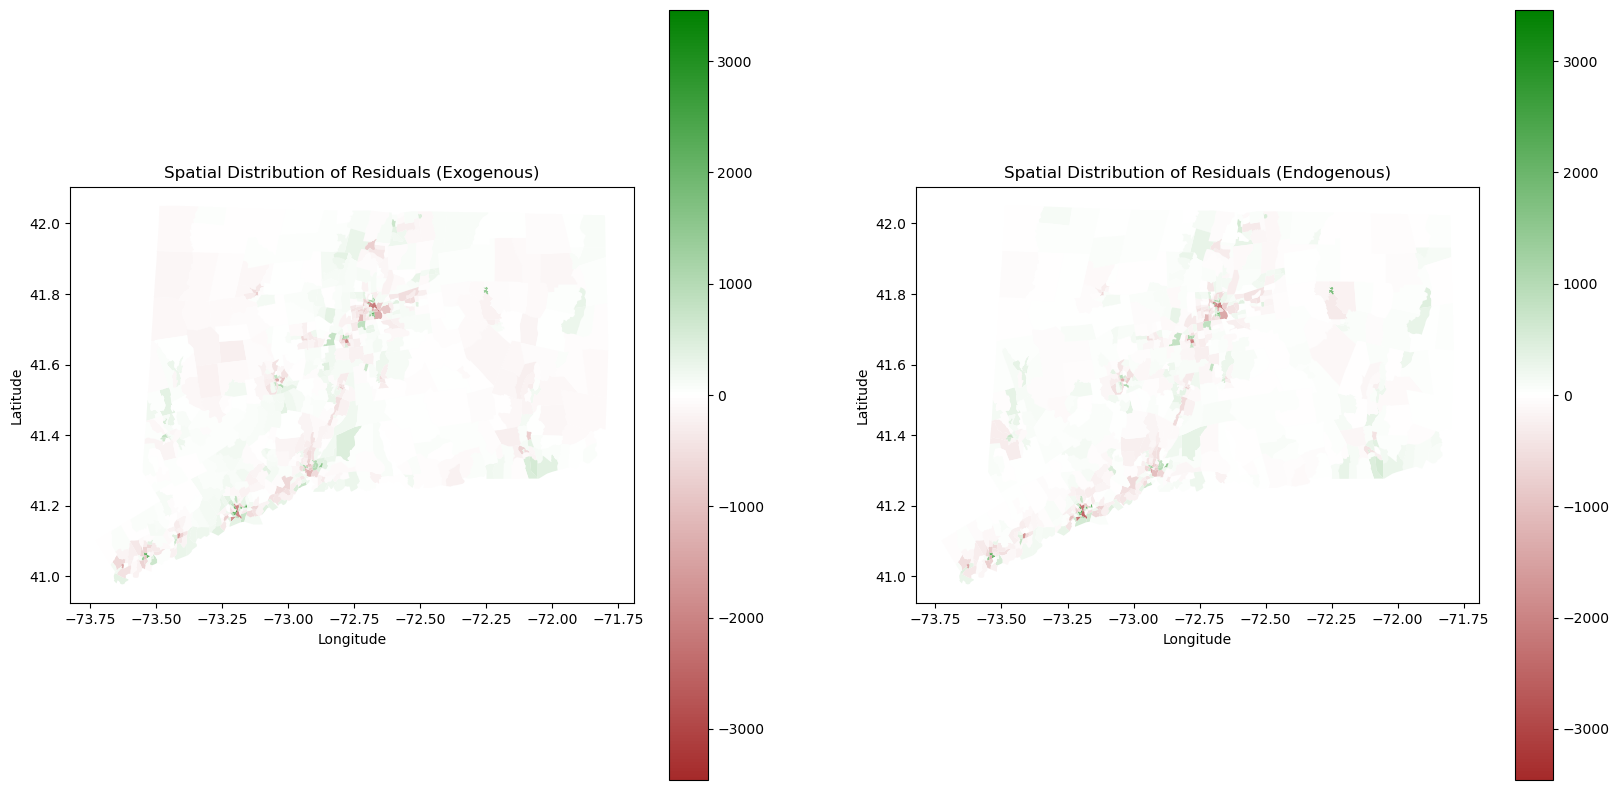

In [60]:
# Define the colors for the custom colormap
colors = [(0, 'brown'), (0.5, 'white'), (1, 'green')]  # Position 0 is brown, position 0.5 is white, position 1 is green

# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Determine the range of residuals to be used for normalization
residuals_max = max(abs(merged_gdf['residuals_exo'].max()), abs(merged_gdf['residuals'].max()))
vmax = residuals_max * 0.75  # Adjust the factor as needed

# Create a normalization object
norm = Normalize(vmin=-vmax, vmax=vmax)

# First graph
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Create a figure with 1 row and 2 columns

# Graph 1 - Exogenous variables
merged_gdf.plot(column='residuals_exo', cmap=cmap, legend=True, ax=axes[0], vmax=vmax, norm=norm)
axes[0].set_title('Spatial Distribution of Residuals (Exogenous)')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Graph 2 - Spatial lag of PopDensity
merged_gdf.plot(column='residuals', cmap=cmap, legend=True, ax=axes[1], vmax=vmax, norm=norm)
axes[1].set_title('Spatial Distribution of Residuals (Endogenous)')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.show()

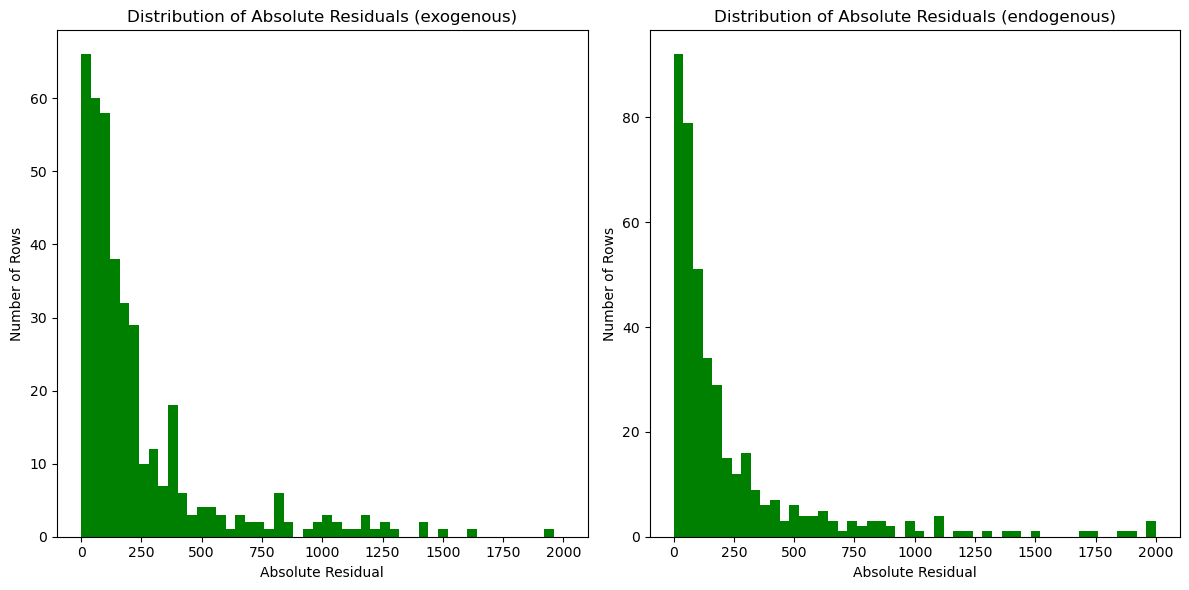

In [61]:
num_bins = 50
hist_range = (0, 2000)

# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram
axs[0].hist(merged_gdf['residuals_exo'], bins=num_bins, range=hist_range, color='green')
axs[0].set_xlabel('Absolute Residual')
axs[0].set_ylabel('Number of Rows')
axs[0].set_title('Distribution of Absolute Residuals (exogenous)')

# Plot the second histogram
axs[1].hist(merged_gdf['residuals'], bins=num_bins, range=hist_range, color='green')
axs[1].set_xlabel('Absolute Residual')
axs[1].set_ylabel('Number of Rows')
axs[1].set_title('Distribution of Absolute Residuals (endogenous)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

The exogenous spatial lag residual map is on the left and the endogenous spatial lag residual map is on the right. Qualitatively assessing the these two maps, we see both models tend to underestimate the population density in urban areas. It is reasonable as land cover data is only two dimensional and does not account for the vertical height of the buildings. We also see slightly differences in prediction of rural areas between Exogenous and Endogenous. Endogenous is more accurate in rural areas as the landcover is not a sole factor of prediction, and it instead takes into account the population density of the tracts around it. Exogenous is slightly more inaccurate in these regions for the lack of this parameter. Both models tend to have a better performance at predicting density in less populated areas (Low-Low tracts). 

Continuing to explore, we created two residual histograms. We noted that they are similar to our map of CT and do not present any new pattern.


To explore a bit deeper into our dataset, we will look at a snapshot of our map around Hartford and its neighboring cities.

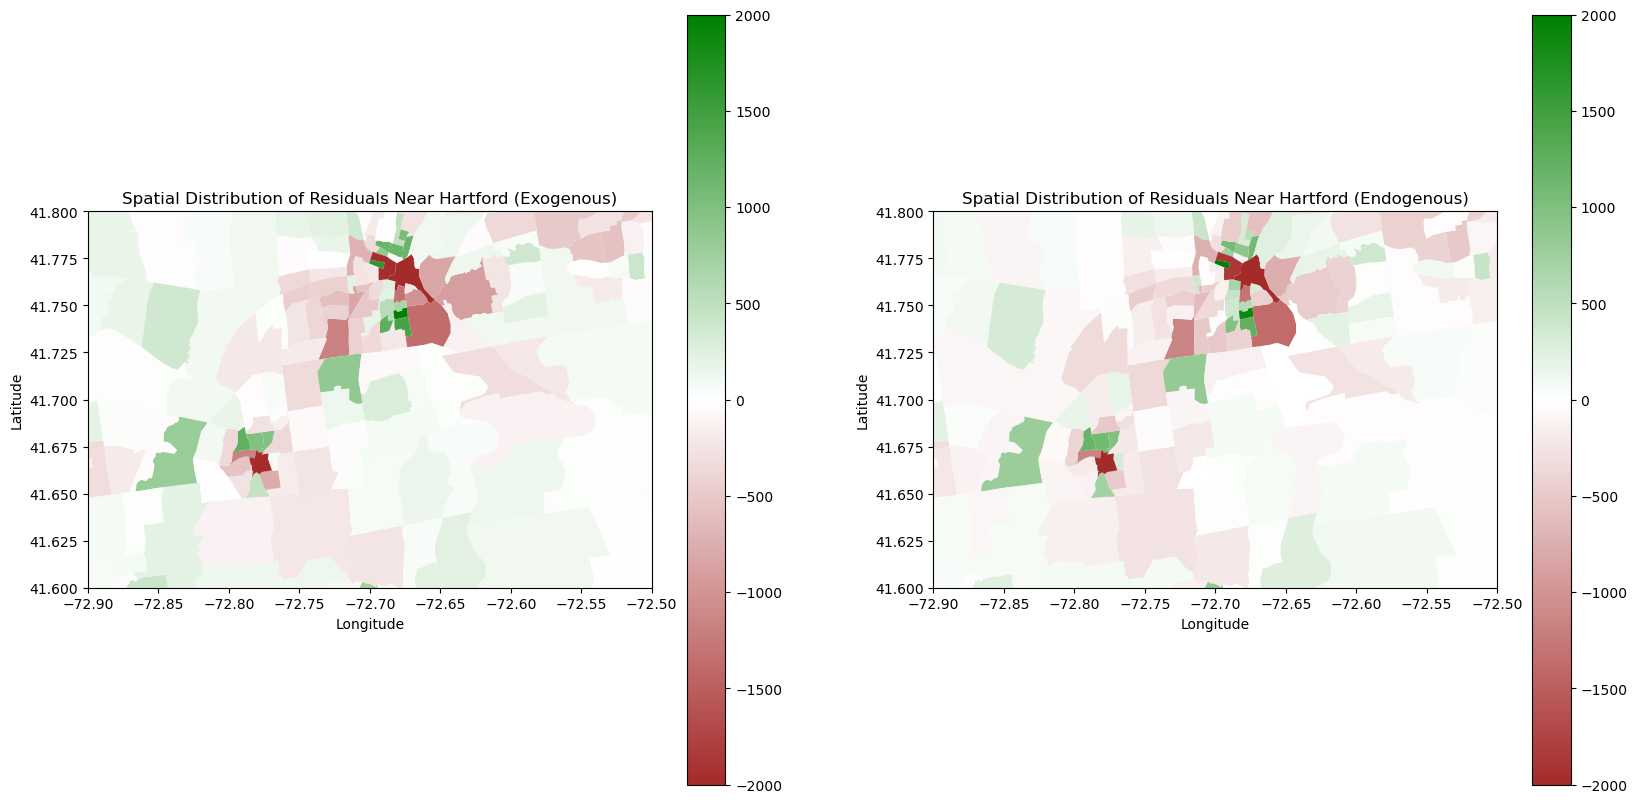

In [62]:
# Create a normalization object
norm = Normalize(vmin=-2000, vmax=2000)

# First graph
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Create a figure with 1 row and 2 columns

# Graph 2 - Exogenous variables
merged_gdf.plot(column='residuals_exo', cmap=cmap, legend=True, ax=axes[0], vmax=vmax, norm=norm)
axes[0].set_title('Spatial Distribution of Residuals Near Hartford (Exogenous)')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Graph 1 - Spatial lag of PopDensity
merged_gdf.plot(column='residuals', cmap=cmap, legend=True, ax=axes[1], vmax=vmax, norm=norm)
axes[1].set_title('Spatial Distribution of Residuals Near Hartford (Endogenous)')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

axes[0].set_ylim([41.6, 41.8])
axes[0].set_xlim([-72.9, -72.5])
axes[1].set_ylim([41.6, 41.8])
axes[1].set_xlim([-72.9, -72.5])

plt.show()

One area we were particularly curious about was Hartford as it is a large urban hub in the central of Connecticut. We noticed that we were grossly underestimating densely populated areas, which makes sense as they are relatively large outliers from the rest of the relatively lower population and spread out suburban areas of Connecticut. However, we were better at calculating more densely populated areas with the Endogenous model. We hypothesize this is due to the fact that Endogenous Models inherently take into account the population densities of neighboring tracts. Thus, there is a greater likelihood that the model will "self-correct" by knowing the population of its neighbors. 

## Training and Testing Cross Validation

For training and testing, we need to separate the data into two. Due to the spatial dependence of tracts, we cannot randomly select tracts from the dataset and assign them to either training or testing data because neighboring tracts will not be in the same dataset. Therefore, to minimize the rupture of spatial relations, we decide to separate training and testing data by neighboring **counties** to ensure that all tracts in training and testiing data are countinuous. Later, we perform for loops on each set of training and testing data and calculate their mean RMSE for each training and testing set for both endogenous and exogenous model. 

In [63]:
merged_csv = pd.read_csv("../data/merged_gdf.csv")

# Extract the county name from the the Geo_NAME column. 
merged_gdf['County'] = merged_gdf['Geo_NAME'].str.split(',').str[1].str.strip().str.replace(' ', '')
merged_gdf = merged_gdf.dropna(subset=['County'])

In [ ]:
# Spatially lagged endogenous regressor
odd_counties = ['NewLondonCounty', 'NewHavenCounty', 'LitchfieldCounty', 'TollandCounty']
even_counties = ['MiddlesexCounty', 'FairfieldCounty','HartfordCounty', 'WindhamCounty']

rmse = []

for i in range(4):
    # Splitting training and testing counties
    train_1 = merged_gdf[(merged_gdf['County'] != odd_counties[i]) & (merged_gdf['County'] != even_counties[i])]
    test_1 = merged_gdf[(merged_gdf['County'] == odd_counties[i]) | (merged_gdf['County'] == even_counties[i])]

    # Queen weight matrix for each train and test
    train_1_w = lp.weights.Queen.from_dataframe(train_1)
    test_1_w = lp.weights.Queen.from_dataframe(test_1)
    
    # Regularize the weights
    train_1_w.transform = 'R'
    test_1_w.transform = 'R'
    
    # Calculate the spatial lag pop density
    train_1['spatial_lag_PopDens'] = lp.weights.lag_spatial(train_1_w, train_1['PopDensity'])
    test_1['spatial_lag_PopDens'] = lp.weights.lag_spatial(test_1_w, test_1['PopDensity'])
    
    y_train = np.array(train_1['PopDensity']).reshape((-1,1))
    x_train = np.array(train_1[predictor])

    y_test = np.array(test_1['PopDensity'])
    x_test = np.array(test_1[predictor])

    # Fit linear regression model using scikit-learn 
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Predict on test data
    y_pred_test = model.predict(x_test)

    # Calculate RMSE
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    rmse.append(test_rmse)


In [67]:
np.mean(rmse)

382.27553702535505

The average root mean square error of the spatially lagged endogenous regression model is 382.28. The endogenous model is more advantageous when we have a relatively higher coverage of census data and we need to predict the population density of small region surrounded by regions with good census. 

Next, we do training and testing cross validation for the exogenous spatial lagged model. 

In [ ]:
# Spatially lagged exogenous regressors

rmse_exo = []

# Set loops for each set of different counties
for i in range(4):

    train_1 = merged_gdf[(merged_gdf['County'] != odd_counties[i]) & (merged_gdf['County'] != even_counties[i])]
    test_1 = merged_gdf[(merged_gdf['County'] == odd_counties[i]) | (merged_gdf['County'] == even_counties[i])]

    train_1_w = lp.weights.Queen.from_dataframe(train_1)
    test_1_w = lp.weights.Queen.from_dataframe(test_1)

    train_1_w.transform = 'R'
    test_1_w.transform = 'R'

    # Calculate spatial lag 
    for j in range(len(landcover_pct)):
        train_1['lag_' + landcover_pct[j]] = lp.weights.lag_spatial(train_1_w, train_1[landcover_pct[j]])
        test_1['lag_' + landcover_pct[j]] = lp.weights.lag_spatial(test_1_w, test_1[landcover_pct[j]])
    
    # Extract training and test data 
    y_train = np.array(train_1['PopDensity']).reshape((-1,1))
    x_train = np.array(train_1[exo_predictor])

    y_test = np.array(test_1['PopDensity'])
    x_test = np.array(test_1[exo_predictor])

    # Fit linear regression model using scikit-learn 
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Predict on test data
    y_pred_test = model.predict(x_test)

    # Calculate RMSE
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    rmse_exo.append(test_rmse)

In [70]:
np.mean(rmse_exo)

391.66561692553

The average RMSE of the spatially lagged endogenous regression model cross validation is 391.67, which is slightly larger than the RMSE of the endogenous model. The exogenous model is more applicable to scenarios when we have good satellite data but sparse census data. 

Comparing our Spatial Autoregression to our Linear regression, it is clear that our Spatial Regression yields better results.

## Concluding Discussion

Through this project, we were able to implement three different forms of Linear Regression, as well as create Spatial Autoregression models, and we determined the efficacy of each of these models both mathematically and graphically. Our results were relatively similar to @tian2005modeling in that they underpredicted the population density in densely populated urban areas more frequently than other plots of land, and over-predicted population density in rural areas. Overall, we accomplished a few key things with project. Through our models, we were able to predict population density with only landcover with relatively strong accuracy. We successfully compared different machine learning models and concluded that Spatial Autoregression was more accurate than Linear Regression. With more time, we would have liked to implement Poisson Regression and performed analysis at the block group level instead of tract level. With more computational power, we would have liked to calculate a larger dataset, representing a larger spatial region. Overall, we are proud of our work!
 

## Group Contributions Statement

Liam helped with data acquisition and preparation, wrote our implementation of linear regression with gradient descent in [linear_regression.py](https://github.com/Liam-W-Smith/csci-0451-final-project/blob/main/code/linear_regression.py), and compared the output of our class with that of scikit-learn. Alex acquired landcover data from Conus, and shapefile data of Connecticut. He then implemented zonal statistics with Manny. Alex explained the differences in Spatial Autoregression methods, trained the models, and utilized cross validation. Manny created visualizations of our models to represent graphically the residuals of each model. He proof-read all of our code, making corrections, rewriting descriptions, and ensuring cohesive and consistent writing styles. He also contributed to code in the Spatial Auto Regression section.

## Personal Reflection

# Non-scholarly sources

- https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html

- https://towardsdatascience.com/linear-regression-5100fe32993a


